In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical

In [ ]:
import sys
# path to the folder with modules
sys.path.append('/task1/')

In [5]:
from MnistClassifier import MnistClassifier
from RandomForest import RandomForest
from FeedForwardNN import FeedForwardNN
from ConvolutionalNeuralNetwork import CNN

In [6]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [7]:
X_train, X_test = X_train / 255.0, X_test / 255.0

X_train_vect = X_train.reshape(-1, 784)
X_test_vect = X_test.reshape(-1, 784)

X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

In [8]:
y_train_cat = to_categorical(y_train, num_classes=10)

In [9]:
print("RandomForest")
rf = RandomForest()
classifier = MnistClassifier(rf)
classifier.train(X_train_vect, y_train)
predictions = classifier.predict(X_test_vect)
# print(predictions[:10])
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")

RandomForest
training
predicting
Accuracy: 0.9704


In [9]:
print("NN")
nn = FeedForwardNN(learning_rate = 0.0005)
classifier = MnistClassifier(nn)
classifier.train(X_train_vect, y_train_cat, epochs = 10, batch_size=128)
predictions = classifier.predict(X_test_vect)
predictions_classes = np.argmax(predictions, axis=1)
accuracy = accuracy_score(y_test, predictions_classes)
print(f"Accuracy: {accuracy:.4f}")

NN


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


training
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7740 - loss: 0.7929 - val_accuracy: 0.9492 - val_loss: 0.1956
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9291 - loss: 0.2451 - val_accuracy: 0.9618 - val_loss: 0.1429
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9488 - loss: 0.1766 - val_accuracy: 0.9693 - val_loss: 0.1135
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9594 - loss: 0.1385 - val_accuracy: 0.9727 - val_loss: 0.0990
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9657 - loss: 0.1150 - val_accuracy: 0.9742 - val_loss: 0.0871
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9718 - loss: 0.1009 - val_accuracy: 0.9757 - val_loss: 0.0857
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9741 - loss: 0.0886 - val_accuracy: 0.9787 - val_loss: 0.0752
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9773 - loss: 0.0778 - val_acc

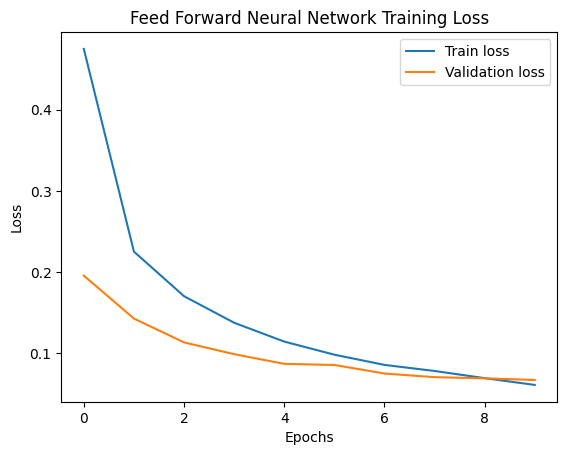

In [10]:
history = nn.history.history
plt.plot(history['loss'], label='Train loss')
plt.plot(history['val_loss'], label='Validation loss')
plt.title("Feed Forward Neural Network Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [13]:
print("CNN")
cnn = CNN(learning_rate=0.0001)
classifier = MnistClassifier(cnn)
classifier.train(X_train_cnn, y_train_cat, epochs = 10, batch_size=32)
predictions = classifier.predict(X_test_cnn)
predictions_classes = np.argmax(predictions, axis=1)
accuracy = accuracy_score(y_test, predictions_classes)
print(f"Accuracy: {accuracy:.4f}")

CNN
training
Epoch 1/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8326 - loss: 0.6112 - val_accuracy: 0.9745 - val_loss: 0.0959
Epoch 2/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9718 - loss: 0.0993 - val_accuracy: 0.9788 - val_loss: 0.0716
Epoch 3/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9809 - loss: 0.0629 - val_accuracy: 0.9842 - val_loss: 0.0553
Epoch 4/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9853 - loss: 0.0499 - val_accuracy: 0.9858 - val_loss: 0.0495
Epoch 5/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9876 - loss: 0.0407 - val_accuracy: 0.9870 - val_loss: 0.0481
Epoch 6/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9905 - loss: 0.0305 - val_accuracy: 0.9872 - val_loss: 0.0437
Epoch 7/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9921 - loss: 0.0252 - val_accuracy: 0.9887 - val_loss: 0.0414
predicting
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.9900


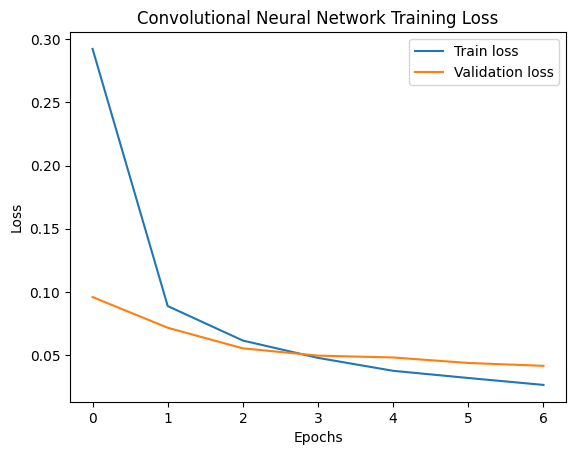

In [14]:
history = cnn.history.history
plt.plot(history['loss'], label='Train loss')
plt.plot(history['val_loss'], label='Validation loss')
plt.title("Convolutional Neural Network Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()